In [66]:
import pandas as pd

In [67]:
df= pd.read_csv('Mall_Customers.csv')

In [68]:
#here ther is no label provided
#work on annual Income (k$) and Spending Score (1-100)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [70]:
df.shape

(200, 5)

In [71]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [73]:
#check for null value
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [74]:
import matplotlib.pyplot as plt

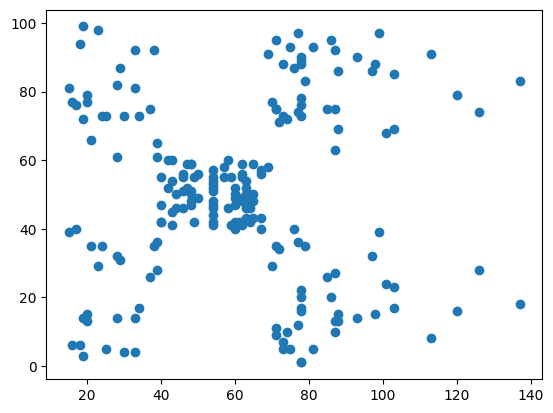

In [75]:
#Do EDA
#from data points we can say there will be 5 clusters
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [76]:
X=df[['Annual Income (k$)','Spending Score (1-100)','Age']].values

In [77]:
from sklearn.cluster import KMeans

In [78]:
#SELECT CLUSTER SIZE AS 5; Default is 8; check with signature Shift + tab 
model=KMeans(n_clusters=5,random_state=0)

In [79]:
model.fit(X)

C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [80]:
y=model.predict(X)

In [81]:
#check clusters as output; It is showing cluster numbers starts from 0 ie 0 to 4 
y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [82]:
#check number of values or data points in each cluster
#output shows at 0th cluster there are 35 data points, ata 1st cluster 81 and so on
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([23, 39, 79, 23, 36], dtype=int64))

In [83]:
np.sum([35, 81, 39, 22, 23])
#df.shape

200

In [84]:
df.shape

(200, 5)

In [85]:
#check for first cluster how many from 0th columns ie Annual Income (k$)
X[y==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

In [86]:
#check how many from 1st columns ie Spending Score (1-100)
X[y==0,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

In [87]:
#check for 4th cluster how many from 0th columns ie Annual Income (k$)
X[y==3,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

In [88]:
#check for 4th cluster how many from 0th columns ie Spending Score (1-100)
X[y==3,1]

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 61, 65], dtype=int64)

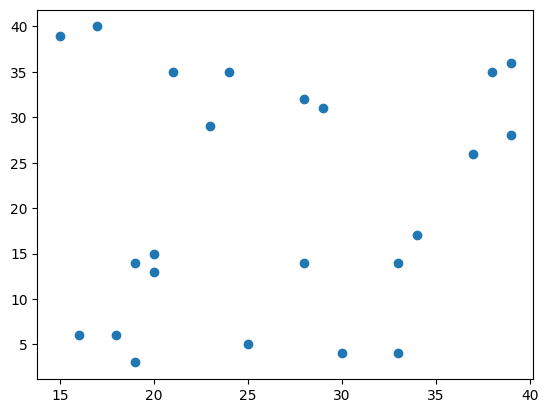

In [89]:
#show data points of 1st cluster with Annual Income (k$) and Spending Score (1-100)
plt.scatter(X[y==0,0],X[y==0,1])

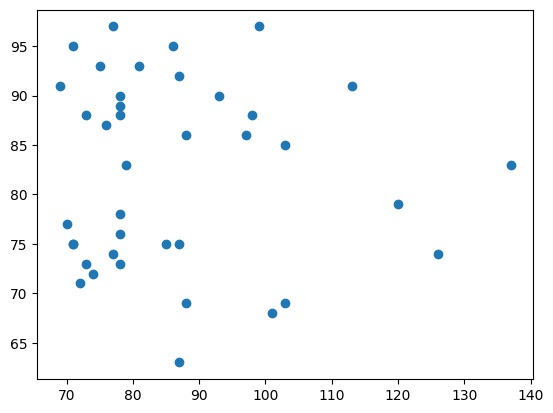

In [90]:
#show data points of 2nd cluster with Annual Income (k$) and Spending Score (1-100)
plt.scatter(X[y==1,0],X[y==1,1])

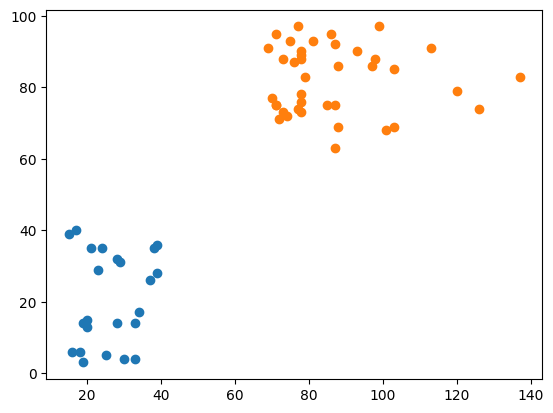

In [91]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

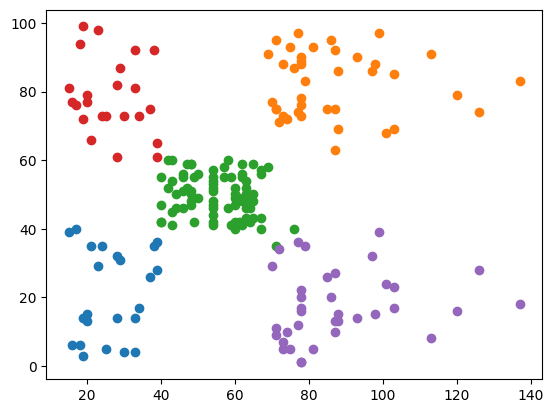

In [92]:
#show clusters combine
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])

In [93]:
#assignment change the value of clusters to 6 ie model=KMeans(n_clusters=6,random_state=0)

In [94]:
#show cluster centers or centroid for Annual Income (k$) and Spending Score (1-100)
model.cluster_centers_

array([[26.30434783, 20.91304348, 45.2173913 ],
       [86.53846154, 82.12820513, 32.69230769],
       [55.29113924, 49.56962025, 43.08860759],
       [26.30434783, 78.56521739, 25.52173913],
       [87.75      , 17.58333333, 40.66666667]])

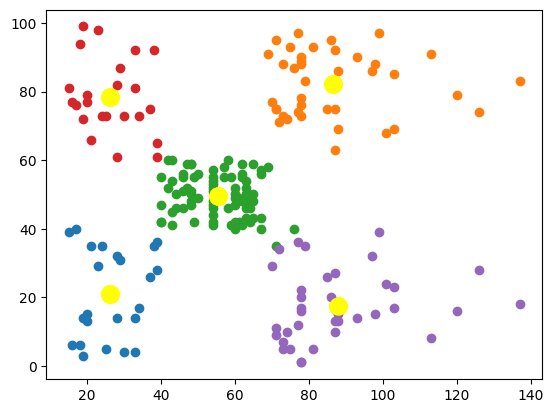

In [95]:
#show clusters combine; s is used for size; s=150
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='yellow')

In [96]:
#sklearn.metrics.silhouette_score as metric
#- silhouette score is btwn -1 to 1
#if silhouette score is near to the -1 mean sprawling(spreading out over a language area in an untidy or irregular way), overlapped clusters and 
#if silhouette score is near 1 means Tight, well-separated clusters

from sklearn.metrics import silhouette_score
silhouette_score(X,y)

0.44428597560893024

In [97]:
#E-low method
#sum of squared errors SSE is calculated for every number and it is stored at parameter called inertia
#inertia = sum if squared distances of sample to their closest cluster center, weighted by the sample weights if provided.
#-if we are getting less number for intertia then we will select that number of cluster
model.inertia_

75350.77917248776

In [98]:
#how many clusters we can make
len(df)
np.sqrt(200)

14.142135623730951

C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\

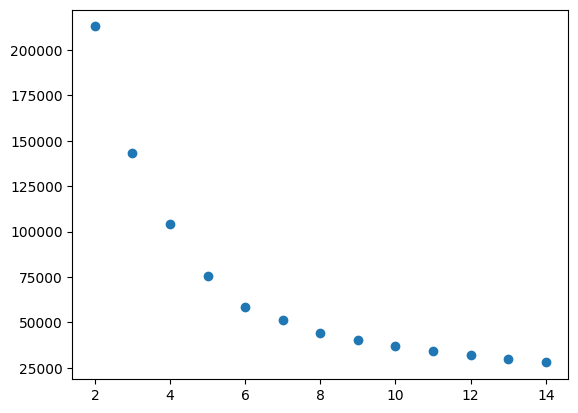

In [99]:
#Elbow nethod
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)

C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\

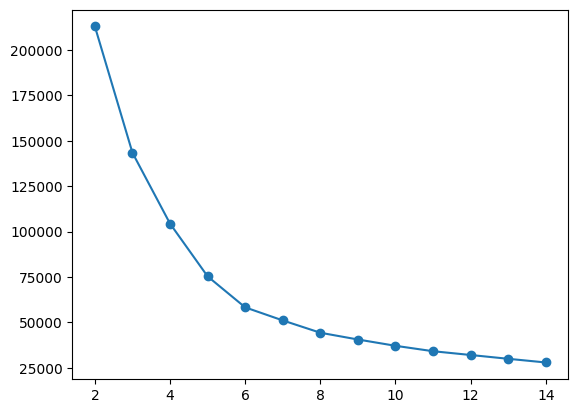

In [103]:
#graph with connecting points
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

In [101]:
# in above output graph at 5 location graph is decreasing so elbow or bend  is at 5 
# so we will select 5 number of clusers as optimum clusters

C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\

2Cluster,Score0.293166070535953
3Cluster,Score0.3839349967742105
4Cluster,Score0.40546302077733304
5Cluster,Score0.44428597560893024
6Cluster,Score0.4523443947724053
7Cluster,Score0.43978902692261157
8Cluster,Score0.42627498428462474


C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Divyanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\

9Cluster,Score0.41197801912451715
10Cluster,Score0.38208687117649454
11Cluster,Score0.36979599088819426
12Cluster,Score0.3531217212122937
13Cluster,Score0.3632420989885516
14Cluster,Score0.3288959080204045


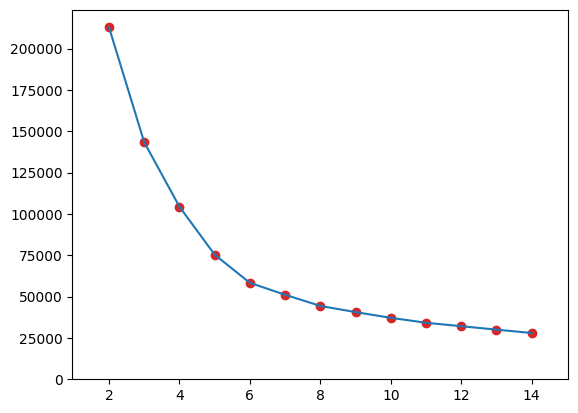

In [102]:
#show silhouette_score with cluster # from output we found that 5 cluster, Score 0.553931997444648 is the maximum score
#so we can finalize the cluster size=5
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
    y=demo_model.predict(X)
    print(f"{i}Cluster,Score{silhouette_score(X,y)}")
    plt.bar(i,silhouette_score(X,y))
plt.scatter(k,sse)
plt.plot(k,sse)
plt.show()
